## The Android App Market on Google Play

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this project, you will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. You'll look for insights in the data to devise strategies to drive growth and retention.

### Columns description:

<b>App:</b> Application name

<b>Category:</b> Category the app belongs to

<b>Rating:</b> Overall user rating of the app (as when scraped)

<b>Reviews:</b> Number of user reviews for the app (as when scraped)

<b>Installs:</b> Number of user downloads/installs for the app (as when scraped)

<b>Type:</b> Paid or Free

<b>Content Rating:</b> Age group the app is targeted at - Children / Mature 21+ / Adult

<b>Genres:</b> An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.


<b>Last Updated:</b> Date when the app was last updated on Play Store (as when scraped)

<b>Current Ver:</b> Current version of the app available on Play Store (as when scraped)

<b>Android Ver:</b> Min required Android version (as when scraped)




## Import packages and load the dataset

In [179]:
# PACKAGES 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [195]:
# READING CSV FILES
Applications = pd.read_csv('googleplaystore.csv')
User_Reviews = pd.read_csv('googleplaystore_user_reviews.csv')
Applications.sample(50)
Applications.shape

(10841, 13)

## Data Preprocessing Pipeline

<img src="Figures/pipeline.jpeg">

# Data Cleaning

### Dropping the duplicates from rows

In [196]:
Applications = Applications.drop_duplicates(subset ="App")
Applications.sample(8)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1500,Zumper - Apartment Rental Finder,HOUSE_AND_HOME,4.4,11200,25M,"1,000,000+",Free,0,Everyone,House & Home,"July 16, 2018",4.5.15,5.0 and up
4277,BTS j-hope LINE Launcher theme,PERSONALIZATION,4.9,934,3.8M,"10,000+",Free,0,Everyone,Personalization,"October 17, 2014",4.1,4.0.3 and up
8284,DC Metro,MAPS_AND_NAVIGATION,3.4,59,1.3M,"10,000+",Free,0,Everyone,Maps & Navigation,"January 26, 2015",1.0,1.5 and up
4849,Dragon X Adventure: Warrior Z,GAME,4.3,8537,29M,"100,000+",Free,0,Everyone 10+,Action,"November 3, 2015",1.1.4,2.3 and up
10551,FK Macva Sabac,SPORTS,NaN,3,26M,10+,Free,0,Everyone,Sports,"February 19, 2018",1.0,4.1 and up
6745,Beauty Rental Shop,FAMILY,4.6,11480,93M,"100,000+",Free,0,Everyone,Simulation,"May 25, 2018",1.0.4,4.4 and up
7178,Nero AirBurn,VIDEO_PLAYERS,4.2,1008,1.7M,"100,000+",Free,0,Everyone,Video Players & Editors,"June 26, 2015",1.0.9,4.0 and up
693,FindLoving,DATING,3.8,24,19M,"1,000+",Free,0,Mature 17+,Dating,"August 2, 2018",1.0.5,4.0 and up


### Checking all the duplicates have been removed

In [197]:
Applications.duplicated(subset = "App").any()

False

### We used this loop to check values in Column Size

In [198]:
c = 0
for row in range(Applications.shape[0]):
    if 'Varies with device' in str(Applications.iloc[row, 4]):
        c+=1
print(c)        

1227


### Removing unneeded columns from Applications dataset Last updated, Current Ver and Android Ver

In [199]:
Applications = Applications.drop(['Current Ver', 'Android Ver'], axis = 1)
Applications.sample(6)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
10159,My EZ-Link Mobile,LIFESTYLE,2.8,3187,11M,"100,000+",Free,0,Everyone,Lifestyle,"January 27, 2017"
10004,EW MOTION THERAPY,HEALTH_AND_FITNESS,NaN,0,7.1M,10+,Free,0,Everyone,Health & Fitness,"July 9, 2018"
2331,mySugr: the blood sugar tracker made just for you,MEDICAL,4.6,21189,36M,"1,000,000+",Free,0,Everyone,Medical,"August 6, 2018"
1231,Cookpad,FOOD_AND_DRINK,4.5,131569,8.2M,"10,000,000+",Free,0,Everyone,Food & Drink,"August 3, 2018"
5259,A-J Media Vault,BOOKS_AND_REFERENCE,NaN,1,24M,50+,Free,0,Everyone,Books & Reference,"January 4, 2017"
8803,DR Sebi's Alkaline List,FAMILY,4.0,68,5.5M,"5,000+",Free,0,Everyone,Education,"April 5, 2017"


### We will drop this row as most of the columns have wrong type of values 

In [200]:
Applications[Applications.Category == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19


In [201]:
Applications = Applications.drop(Applications[Applications.Category == '1.9'].index)

### Removing unneeded characters [ ',' , '$' , '+' , '_' ] in Category, Installs and Price columns and converting them into numeric columns except category

In [202]:
cols_to_clean = ['Installs', 'Price']
for col in cols_to_clean:
    Applications[col] = Applications[col].str.replace(',', '')
    Applications[col] = Applications[col].str.replace('$', '')
    Applications[col] = Applications[col].str.replace('+', '')
    
Applications['Category'] = Applications['Category'].str.replace('_', ' ')

Applications['Installs'] = pd.to_numeric(Applications['Installs'], errors='ignore')
Applications['Price'] = pd.to_numeric(Applications['Price'], errors='ignore')

# Removing unneeded characters ['M', 'k'] in size column and converting all the values to MB unit

for row in range(Applications.shape[0]):
    
    if 'M' in str(Applications.iloc[row, 4]):
        value = Applications.iloc[row, 4].replace('M', '')
        value = float(value)
        Applications.iloc[row, 4] = value
        
    elif 'k' in str(Applications.iloc[row, 4]):
        value = Applications.iloc[row, 4].replace('k', '')
        value = round(float(value))
        value = (value / 1000)
        Applications.iloc[row, 4] = value
        
    Applications.iloc[row, 5] = int(Applications.iloc[row, 5])
    Applications.iloc[row, 7] = int(Applications.iloc[row, 7])   
    
Applications['Size'] = pd.to_numeric(Applications['Size'], errors='ignore')  

### Removing unneeded values in Genres column by splitting it

In [203]:
genres = Applications["Genres"].unique()

def length(word):
    return( len(word.split(';')) )

noOfGenres = np.vectorize(length)


In [204]:
Applications[["genre1", "genre2"]] = Applications["Genres"].str.split(";", expand=True)

Applications['noOfGenres'] = noOfGenres(Applications["Genres"])
Applications.loc[Applications['noOfGenres'] == 2, 'Genres'] = Applications["genre2"]
Applications.loc[Applications['noOfGenres'] == 1, 'Genres'] = Applications["genre1"]

Applications = Applications.drop(['genre1'], axis = 1)
Applications = Applications.drop(['genre2'], axis = 1)
Applications = Applications.drop(['noOfGenres'], axis = 1)


### Removing Varies with device value in each app with the a mean value of size of similar app category

In [205]:
temp1 = Applications[Applications.Size == 'Varies with device']
temp2 = Applications[Applications.Size != 'Varies with device']
temp2[ temp2.Category  == 'FAMILY' ].Size.mean()
temp2['Size'] = pd.to_numeric(temp2["Size"])
temp3 = temp2.groupby('Category', as_index=False)['Size'].mean()
catValues = temp3.Category.values

for i in range(0,len(catValues)):  
    temp1.loc[temp1['Category'] == str(catValues[i]), ['Size']] = float(temp3[temp3[ 'Category' ] == str(catValues[i])].Size) 


Applications[Applications.Size == 'Varies with device'] = temp1   
Applications["Size"] = pd.to_numeric(Applications["Size"])
Applications


/Users/loai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159,19.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART AND DESIGN,3.9,967,14.000000,500000,Free,0.0,Everyone,Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510,8.700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART AND DESIGN,4.5,215644,25.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.3,967,2.800000,100000,Free,0.0,Everyone,Creativity,"June 20, 2018"
5,Paper flowers instructions,ART AND DESIGN,4.4,167,5.600000,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017"
6,Smoke Effect Photo Maker - Smoke Editor,ART AND DESIGN,3.8,178,19.000000,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018"
7,Infinite Painter,ART AND DESIGN,4.1,36815,29.000000,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018"
8,Garden Coloring Book,ART AND DESIGN,4.4,13791,33.000000,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017"
9,Kids Paint Free - Drawing Fun,ART AND DESIGN,4.7,121,3.100000,10000,Free,0.0,Everyone,Creativity,"July 3, 2018"


### Cleaning Last Updated column by converting it into Date

In [206]:
import datetime

cols_to_clean = ['Last Updated']

for col in cols_to_clean:
    Applications[col] = Applications[col].str.replace('January', '01')
    Applications[col] = Applications[col].str.replace('February', '02')
    Applications[col] = Applications[col].str.replace('March', '03')
    Applications[col] = Applications[col].str.replace('April', '04')
    Applications[col] = Applications[col].str.replace('May', '05')
    Applications[col] = Applications[col].str.replace('June', '06')
    Applications[col] = Applications[col].str.replace('July', '07')
    Applications[col] = Applications[col].str.replace('August', '08')
    Applications[col] = Applications[col].str.replace('September', '09')
    Applications[col] = Applications[col].str.replace('October', '10')
    Applications[col] = Applications[col].str.replace('November', '11')
    Applications[col] = Applications[col].str.replace('December', '12')
    
    Applications[col] = Applications[col].str.replace(' ', '/')
    Applications[col] = Applications[col].str.replace(',', '/')
    Applications[col] = Applications[col].str.replace('//', '/')
    
    Applications[col] = Applications[col].str.replace('/1/', '/01/')
    Applications[col] = Applications[col].str.replace('/2/', '/02/')
    Applications[col] = Applications[col].str.replace('/3/', '/03/')
    Applications[col] = Applications[col].str.replace('/4/', '/04/')
    Applications[col] = Applications[col].str.replace('/5/', '/05/')
    Applications[col] = Applications[col].str.replace('/6/', '/06/')
    Applications[col] = Applications[col].str.replace('/7/', '/07/')
    Applications[col] = Applications[col].str.replace('/8/', '/08/')
    Applications[col] = Applications[col].str.replace('/9/', '/09/')
    Applications[col] = Applications[col].str.replace('/9/', '/09/')
  
    Applications[col] = pd.to_numeric(Applications[col], errors='ignore')  
    
Applications['Last Updated'] = pd.to_datetime(Applications['Last Updated'], format='%m/%d/%Y')  
Applications['Last Updated Numeric'] = pd.to_numeric( Applications['Last Updated'])

Applications.sample(6)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Last Updated Numeric
5418,Heroes of Order & Chaos,FAMILY,4.2,690148,25.000000,10000000,Free,0.0,Teen,Strategy,2017-10-27,1509062400000000000
7815,Combat Strike CS 🔫 Counter Terrorist Attack FPS💣,GAME,4.1,1019,39.000000,100000,Free,0.0,Teen,Action,2018-07-23,1532304000000000000
9384,Driving School 3D 2017,FAMILY,3.9,5075,48.000000,500000,Free,0.0,Everyone,Simulation,2017-04-04,1491264000000000000
3324,TunnelBear VPN,TOOLS,4.4,139480,8.782837,5000000,Free,0.0,Everyone,Tools,2018-04-19,1524096000000000000
9197,Online Kerala EB Bill Pay,FINANCE,4.0,37,3.900000,5000,Free,0.0,Everyone,Finance,2017-11-16,1510790400000000000
231,Tiny Scanner - PDF Scanner App,BUSINESS,4.7,286897,39.000000,10000000,Free,0.0,Everyone,Business,2017-05-30,1496102400000000000


### Number of missing values per column in Applications dataset

In [207]:
missing_values_count_Applications = Applications.isnull().sum()
missing_values_count_Applications

App                        0
Category                   0
Rating                  1463
Reviews                    0
Size                       0
Installs                   0
Type                       1
Price                      0
Content Rating             0
Genres                     0
Last Updated               0
Last Updated Numeric       0
dtype: int64

### Replacing NaNs in Type and Content Rating columns with the value before it because there is only one null in each column

In [208]:
Type = Applications['Type'].fillna(method = 'bfill')
Content_Rating = Applications['Content Rating'].fillna(method = 'bfill')
Applications['Type'] = Type
Applications['Content Rating'] = Content_Rating

In [209]:
User_Reviews.sample(6)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
8801,App vault,NaN,NaN,NaN,NaN
16938,Bowmasters,So many adds screen watch chest x2 second chan...,Positive,0.020000,0.380000
7476,Angry Birds Classic,I rating negative 1. I FED UP freezing issues!...,Negative,-0.292969,0.366667
50004,FreshBooks Classic,I would really like see PDF support receipts c...,Positive,0.082857,0.325714
11365,Baby Name Together,Have gd options,Neutral,0.000000,0.000000
60953,Helix Jump,The best minimalistic Game ever.. I play forev...,Positive,0.314286,0.564286


### Number of missing values per column in User_Reviews dataset

In [210]:
missing_values_count_User_Reviews = User_Reviews.isnull().sum()
missing_values_count_User_Reviews

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

### Removing all rows with NaN values

In [211]:
User_reviews_Without_Missing_Values = User_Reviews.dropna() 

### Approximating sentiment columns to 2 decimal places

In [212]:
User_reviews_Without_Missing_Values = User_reviews_Without_Missing_Values.round(1)
User_reviews_Without_Missing_Values.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.5
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.2,0.3
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.4,0.9
4,10 Best Foods for You,Best idea us,Positive,1.0,0.3
5,10 Best Foods for You,Best way,Positive,1.0,0.3


### The Rating col in Applications datasets contains many NaN values, 
since we have User_Reviews dataset we will classify the sentiment column in a rating from 1 to 5 and then take the mean



In [213]:
Rating_Of_User_Review = []
for sentiment in User_reviews_Without_Missing_Values["Sentiment_Polarity"]:
    if -1 <= sentiment <= -0.6:
        Rating_Of_User_Review.append(1)
    elif -0.5 <= sentiment <= -0.1:
        Rating_Of_User_Review.append(2)
    elif 0.1 <= sentiment <= 0.5:
        Rating_Of_User_Review.append(4)
    elif 0.6 <= sentiment <= 1:
        Rating_Of_User_Review.append(5)
    else:
        Rating_Of_User_Review.append(3)
        
User_reviews_Without_Missing_Values["Rating"] = Rating_Of_User_Review
User_reviews_Without_Missing_Values.head(25)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Rating
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.5,5
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.2,0.3,4
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.4,0.9,4
4,10 Best Foods for You,Best idea us,Positive,1.0,0.3,5
5,10 Best Foods for You,Best way,Positive,1.0,0.3,5
6,10 Best Foods for You,Amazing,Positive,0.6,0.9,5
8,10 Best Foods for You,"Looking forward app,",Neutral,0.0,0.0,3
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.0,0.0,3
10,10 Best Foods for You,good you.,Positive,0.7,0.6,5
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.2,0.1,4


### Average Rating of each app in User_reviews_Without_Missing_Values dataset

In [214]:
mean = User_reviews_Without_Missing_Values.groupby('App', as_index=False)['Rating'].mean()
User_reviews_Mean_Rating = pd.DataFrame(mean)
User_reviews_Mean_Rating.columns = ['App', 'Mean Rating']
User_reviews_Mean_Rating.sample(6)

,App,Mean Rating
507,Dumb Ways to Die 2: The Games,3.135135
194,Bank of America Mobile Banking,3.531250
606,File Manager -- Take Command of Your Files Easily,3.545455
347,Chase Mobile,3.200000
624,Flashlight HD LED,4.310345
811,Hay Day,3.147541


In [215]:
AppTest = Applications.copy()
MeanTest = User_reviews_Mean_Rating.copy()

In [216]:
merged = pd.merge(AppTest, MeanTest,  how='left')
merged = merged.drop(['Category', 'Size', 'Reviews', 'Installs', 'Type', 'Price','Last Updated', 'Content Rating', 'Genres'], axis=1)
merged.sample(6)

,App,Rating,Last Updated Numeric,Mean Rating
662,My Class Schedule: Timetable,4.1,1464739200000000000,NaN
3788,v-view,3.6,1498089600000000000,NaN
3180,All C Programs,4.7,1528502400000000000,NaN
7101,Vira.cz Widget,NaN,1465948800000000000,NaN
1120,Pregnancy Tracker,4.1,1518220800000000000,NaN
7233,Scratch Logo Quiz. Challenging brain puzzle,3.3,1530316800000000000,NaN


### Removing NaNs in rating

In [217]:
for row in range (merged.shape[0]):
    if not (1 <= merged.iloc[row, 1] <= 19):
        merged.iloc[row, 1] = merged.iloc[row, 2]
    

In [218]:
merged.isnull().sum() # same result as before, so we will use another approach.

App                        0
Rating                     0
Last Updated Numeric       0
Mean Rating             8843
dtype: int64

### Replacing NaNs in Rating column with the a mean value of applications with same category and genre.

In [219]:
Category_Genres_Mean_Rating = Applications.groupby(['Category', 'Genres'], as_index=False)['Rating'].mean()
Category_Genres_Mean_Rating = pd.DataFrame(Category_Genres_Mean_Rating)
Category_Genres_Mean_Rating.columns = ['Category', 'Genres', 'Rating']
Category_Genres_Mean_Rating

,Category,Genres,Rating
0,ART AND DESIGN,Action & Adventure,NaN
1,ART AND DESIGN,Art & Design,4.358182
2,ART AND DESIGN,Creativity,4.440000
3,ART AND DESIGN,Pretend Play,3.900000
4,AUTO AND VEHICLES,Auto & Vehicles,4.190411
5,BEAUTY,Beauty,4.278571
6,BOOKS AND REFERENCE,Books & Reference,4.344970
7,BUSINESS,Business,4.098479
8,COMICS,Comics,4.169811
9,COMICS,Creativity,4.800000


### Replacing the null values in Rating column with the a new value in Category_Genres_Mean_Rating dataset that matches the same category and genre



In [220]:
for row in range(Applications.shape[0]):
    if 'nan' in str(Applications.iloc[row, 2]):
        App_category = Applications.iloc[row, 1]
        App_Genre = Applications.iloc[row, 9]
        result = Category_Genres_Mean_Rating.loc[Category_Genres_Mean_Rating["Category"] == App_category]
        Rating = result.loc[Category_Genres_Mean_Rating["Genres"] == App_Genre]['Rating'].values
        Applications.iloc[row, 2] = Rating

### Checking if there is still any missing value 

In [221]:
Missing_Values_New = Applications.isnull().sum()
Missing_Values_New

App                     0
Category                0
Rating                  1
Reviews                 0
Size                    0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Last Updated Numeric    0
dtype: int64

### Removing the last null value with the rating before it

In [222]:
Rat = Applications['Rating'].fillna(method = 'bfill')
Applications['Rating'] = Rat

### Applying One-Hot Encoding to 'Type' and 'Content Rating' columns 

In [223]:
encoding_dataset = Applications.copy()
Encoding_ContentRating = pd.get_dummies(encoding_dataset['Content Rating'])
Encoding_Type = pd.get_dummies(encoding_dataset['Type'])
One_hot_encoded_data_age = pd.concat([encoding_dataset.drop(['Content Rating', 'Type'], axis = 1),Encoding_Type, Encoding_age], axis = 1) 
One_hot_encoded_data_age.head()

One_hot_encoded_data_age.loc[One_hot_encoded_data_age.Unrated == 1 , 'Everyone' ] = 1 
One_hot_encoded_data_age.loc[One_hot_encoded_data_age.Unrated == 1 , 'Unrated' ] = 0

One_hot_encoded_data_age[One_hot_encoded_data_age.Unrated == 1]


One_hot_encoded_data_age = One_hot_encoded_data_age.drop(['Unrated'], axis = 1)
One_hot_encoded_data_age



,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Last Updated Numeric,Free,Paid,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.100000,159,19.000000,10000,0.0,Art & Design,2018-01-07,1515283200000000000,1,0,0,1,0,0,0
1,Coloring book moana,ART AND DESIGN,3.900000,967,14.000000,500000,0.0,Pretend Play,2018-01-15,1515974400000000000,1,0,0,1,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.700000,87510,8.700000,5000000,0.0,Art & Design,2018-08-01,1533081600000000000,1,0,0,1,0,0,0
3,Sketch - Draw & Paint,ART AND DESIGN,4.500000,215644,25.000000,50000000,0.0,Art & Design,2018-06-08,1528416000000000000,1,0,0,0,0,0,1
4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.300000,967,2.800000,100000,0.0,Creativity,2018-06-20,1529452800000000000,1,0,0,1,0,0,0
5,Paper flowers instructions,ART AND DESIGN,4.400000,167,5.600000,50000,0.0,Art & Design,2017-03-26,1490486400000000000,1,0,0,1,0,0,0
6,Smoke Effect Photo Maker - Smoke Editor,ART AND DESIGN,3.800000,178,19.000000,50000,0.0,Art & Design,2018-04-26,1524700800000000000,1,0,0,1,0,0,0
7,Infinite Painter,ART AND DESIGN,4.100000,36815,29.000000,1000000,0.0,Art & Design,2018-06-14,1528934400000000000,1,0,0,1,0,0,0
8,Garden Coloring Book,ART AND DESIGN,4.400000,13791,33.000000,1000000,0.0,Art & Design,2017-09-20,1505865600000000000,1,0,0,1,0,0,0
9,Kids Paint Free - Drawing Fun,ART AND DESIGN,4.700000,121,3.100000,10000,0.0,Creativity,2018-07-03,1530576000000000000,1,0,0,1,0,0,0


### Looking for categories

In [224]:
Sum_Of_different_Categories = Applications['Category'].value_counts()
Sum_Of_different_Categories 

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH AND FITNESS      288
PHOTOGRAPHY             281
NEWS AND MAGAZINES      254
SOCIAL                  239
BOOKS AND REFERENCE     222
TRAVEL AND LOCAL        219
SHOPPING                202
DATING                  171
VIDEO PLAYERS           163
MAPS AND NAVIGATION     131
EDUCATION               119
FOOD AND DRINK          112
ENTERTAINMENT           102
AUTO AND VEHICLES        85
LIBRARIES AND DEMO       84
WEATHER                  79
HOUSE AND HOME           74
EVENTS                   64
ART AND DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [225]:
Applications.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Last Updated Numeric
4998,AE Basketball,SPORTS,4.000000,8100,24.058361,1000000,Free,0.0,Everyone,Sports,2013-11-20,1384905600000000000
1054,Nedbank Money,FINANCE,4.200000,6076,32.000000,500000,Free,0.0,Everyone,Finance,2018-07-28,1532736000000000000
5298,Wallpapers AK 12,PERSONALIZATION,4.332215,0,11.000000,10,Free,0.0,Teen,Personalization,2018-04-12,1523491200000000000
6518,2017 BN SM Sales Conference,BUSINESS,4.098479,2,10.000000,100,Free,0.0,Teen,Business,2017-09-28,1506556800000000000
3933,Hungry Hearts Diner: A Tale of Star-Crossed Souls,FAMILY,4.900000,46253,56.000000,500000,Free,0.0,Everyone 10+,Simulation,2018-02-07,1517961600000000000


## A -  Investigating different app categories

#### 1- How many unique categories are in the dataset? 

First, we removed the duplicates in the dataset. After counting the number of unique categories, we found that there are 34 different categories in the dataset. Then we counted the number of apps in each category and we found that there is a category called "1.9" that contains only one app. We searched for this category and we realized that it is related to the "LIFESTYLE" category. So our dataset now has 33 different categories.   

#### 2- Which of these categories have the fewest number of apps? 


In the figure above, we can observe that the categories BEAUTY, COMICS, PARENTING, AUTO_AND_VEHICLES, LIBRARIES_AND_DEMO, WEATHER HOUSE_AND_HOME and EVENTS ART_AND_DESIGN have the fewest number of apps which does not exceed 100 apps.     




In [226]:
Sum_Of_different_Categories = Applications.groupby('Category').first()
Sum_Of_different_Categories['Count'] = Applications['Category'].value_counts()
Sum_Of_different_Categories = Sum_Of_different_Categories.drop(['App', 'Rating', 'Size', 'Reviews', 'Installs', 'Type', 'Price','Last Updated', 'Content Rating', 'Genres', 'Last Updated Numeric'], axis=1)
Sum_Of_different_Categories.reset_index(inplace=True)
Sum_Of_different_Categories = Sum_Of_different_Categories.sort_values(by = 'Count', ascending = False)
Sum_Of_different_Categories

,Category,Count
11,FAMILY,1832
14,GAME,959
29,TOOLS,827
4,BUSINESS,420
20,MEDICAL,395
23,PERSONALIZATION,376
25,PRODUCTIVITY,374
18,LIFESTYLE,369
12,FINANCE,345
28,SPORTS,325


### Looking for top categories

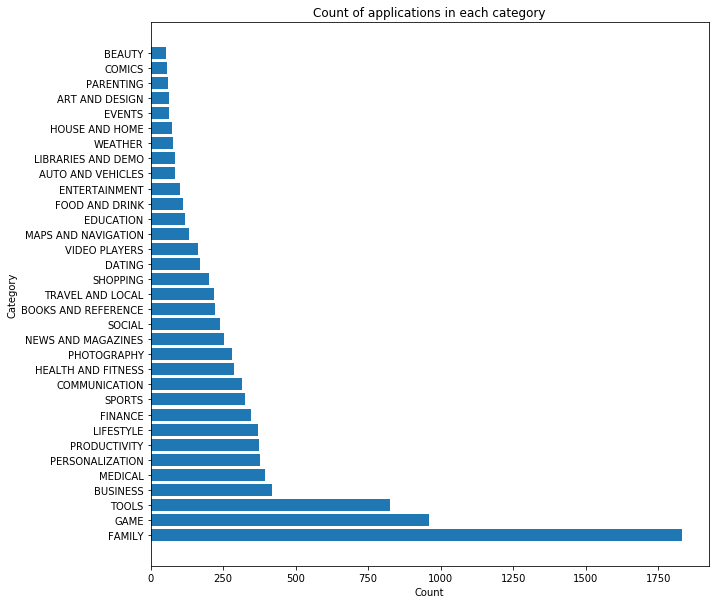

In [227]:
countValues = Sum_Of_different_Categories['Count'].values
categoryValues = Sum_Of_different_Categories['Category'].values

fig = plt.figure(figsize=(10,10))

plt.barh(np.arange(len(countValues)) , countValues)
plt.yticks(np.arange(len(countValues)) , categoryValues )

plt.ylabel('Category')
plt.xlabel('Count')
plt.title("Count of applications in each category")
plt.show()


fig.savefig('Figures/CountsPerCat.jpg')

### Looking for top installed categories

#### 3- Which of these categories have the highest number of apps?

In the figure above, we can also observe that the categories FAMILY, GAMES and TOOLS have the highest number of apps which exceeds 500 apps.                     

#### 4- What type of categories do people mostly install? 

In the figure below, we can observe that GAME, COMMUNICATION and TOOLS are the top three categories that people mostly install. GAME comes first with more than 13 Billion installs, COMMUNICATION comes second with more than 11 billion installs and TOOLS comes third with more than 8 Billion installs.




In [228]:
sum = Applications.groupby('Category', as_index=False)['Installs'].sum()
Categories_Sum_Of_Installs = pd.DataFrame(sum)
Categories_Sum_Of_Installs.columns = ['Category', 'Sum']
Categories_Sum_Of_Installs = Categories_Sum_Of_Installs.sort_values(by = 'Sum', ascending = False)
Categories_Sum_Of_Installs

,Category,Sum
14,GAME,13878924415
6,COMMUNICATION,11038276251
29,TOOLS,8001771915
25,PRODUCTIVITY,5793091369
27,SOCIAL,5487867902
24,PHOTOGRAPHY,4649147655
11,FAMILY,4427941505
31,VIDEO PLAYERS,3926902720
30,TRAVEL AND LOCAL,2894887146
21,NEWS AND MAGAZINES,2369217760


### Number of installation of each application in each category

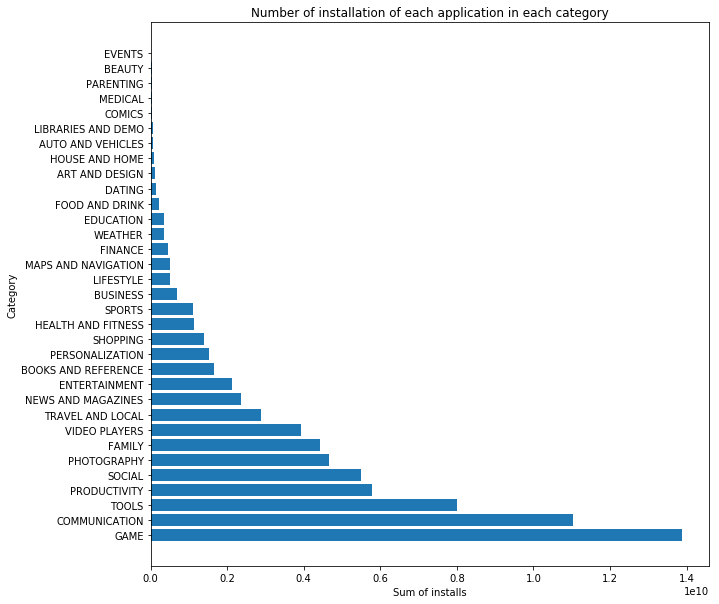

In [229]:
sumValues = Categories_Sum_Of_Installs['Sum'].values
categoryValues = Categories_Sum_Of_Installs['Category'].values

fig = plt.figure(figsize=(10,10))

plt.barh(np.arange(len(countValues)) , sumValues)
plt.yticks(np.arange(len(countValues)) , categoryValues )

plt.ylabel('Category')
plt.xlabel('Sum of installs')
plt.title("Number of installation of each application in each category")
plt.show()


fig.savefig('Figures/SumOfInstallsPerCat.jpg')

## B - Exploring free and paid apps

### 1. Looking which type of apps are mostly downloaded (whether free or paid depending on num. of installs ?)

In [230]:


priceType = Applications.groupby('Type', as_index=False)['Installs'].sum()
priceType_DF = pd.DataFrame(priceType)
priceType_DF.columns = ['Price Type', 'Sum']
priceType_DF = priceType_DF.sort_values(by = 'Sum', ascending = False)
priceType_DF

,Price Type,Sum
0,Free,75065572646
1,Paid,57364881


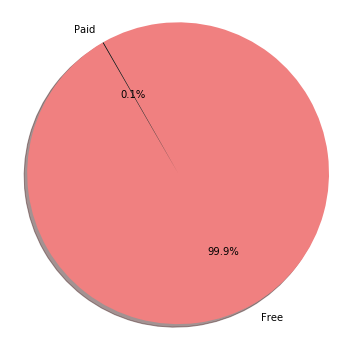

In [231]:
fig = plt.figure(figsize=(6,6))
colors = ['lightcoral', 'black']
plt.pie(priceType_DF['Sum'].values, labels = priceType_DF['Price Type'].values, colors= colors, autopct = '%1.1f%%', shadow = True, startangle = 120)
plt.axis('equal')
plt.show()
fig.savefig('Figures/TypeOfAppsMostlyDownloaded.jpg')

### 2. Looking how many free and paid apps are in the play store

In [232]:

Count_Of_App_PriceType = Applications.groupby('Type').first()
Count_Of_App_PriceType['Count'] = Applications['Type'].value_counts()
Count_Of_App_PriceType = Count_Of_App_PriceType.drop(['App', 'Category', 'Rating', 'Size', 'Reviews', 'Installs', 'Price','Last Updated', 'Content Rating', 'Genres', 'Last Updated Numeric'], axis=1)
Count_Of_App_PriceType.reset_index(inplace=True)
Count_Of_App_PriceType = Count_Of_App_PriceType.sort_values(by = 'Count', ascending = False)
Count_Of_App_PriceType

,Type,Count
0,Free,8903
1,Paid,756


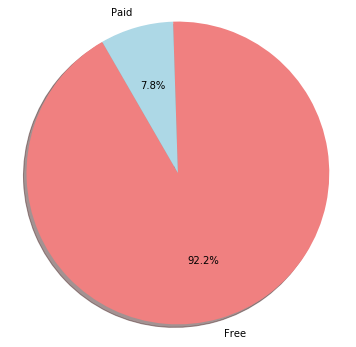

In [233]:
fig = plt.figure(figsize=(6,6))
colors = ['lightcoral', 'lightblue']
plt.pie(Count_Of_App_PriceType['Count'].values, labels = Count_Of_App_PriceType['Type'].values, colors= colors, autopct = '%1.1f%%', shadow = True, startangle = 120)
plt.axis('equal')
plt.show()
fig.savefig('Figures/DistributionOfAppType.jpg')

### 3. Finding the category that has the most expensive app ?



The output below shows the categories that have the most expensive apps in the dataset. LIFESTYLE, FINANCE and FAMILY have the most expensive apps which nearly cost $400.



In [234]:
Most_Expensive_App_InEach_Category = Applications.groupby('Category', as_index=False)['Price'].max()
Most_Expensive_App_InEach_Category = pd.DataFrame(Most_Expensive_App_InEach_Category)
Most_Expensive_App_InEach_Category.columns = ['Category', 'Max Price']
Most_Expensive_App_InEach_Category = Most_Expensive_App_InEach_Category.sort_values(by = 'Max Price', ascending = False)
Most_Expensive_App_InEach_Category.head(5)

,Category,Max Price
18,LIFESTYLE,400.0
12,FINANCE,399.0
11,FAMILY,399.0
20,MEDICAL,200.0
25,PRODUCTIVITY,154.0


### Name of the most expensive apps

After running the cell below, We observed that the most expensive application in the three categories mentioned above is the same application but with different editions. For example, all the applications contains "I'm rich" or " i am rich" concatinated with different words like "Pro" or "Premium". This observation took our attention as the number of installs of each variant is more than 1000 installs given that each app costs nearly 400$.

In [235]:
Expensive_APPs = Applications[Applications.Price > 398]
Expensive_APPs = Expensive_APPs[Applications.Installs > 100 ]
Expensive_APPs

/Users/loai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Last Updated Numeric
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.000,10000,Paid,399.0,Everyone,Lifestyle,2018-03-11,1520726400000000000
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,10000,Paid,400.0,Everyone,Lifestyle,2018-05-03,1525305600000000000
5351,I am rich,LIFESTYLE,3.8,3547,1.800,100000,Paid,399.0,Everyone,Lifestyle,2018-01-12,1515715200000000000
5354,I am Rich Plus,FAMILY,4.0,856,8.700,10000,Paid,399.0,Everyone,Entertainment,2018-05-19,1526688000000000000
5356,I Am Rich Premium,FINANCE,4.1,1867,4.700,50000,Paid,399.0,Everyone,Finance,2017-11-12,1510444800000000000
5358,I am Rich!,FINANCE,3.8,93,22.000,1000,Paid,399.0,Everyone,Finance,2017-12-11,1512950400000000000
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000,Paid,399.0,Everyone,Finance,2017-05-01,1493596800000000000
5362,I Am Rich Pro,FAMILY,4.4,201,2.700,5000,Paid,399.0,Everyone,Entertainment,2017-05-30,1496102400000000000
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.700,1000,Paid,399.0,Teen,Finance,2017-12-06,1512518400000000000
5369,I am Rich,FINANCE,4.3,180,3.800,5000,Paid,399.0,Everyone,Finance,2018-03-22,1521676800000000000


In [236]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### The most expensive applications which is almost 399 or 400 which got more than 100 installs

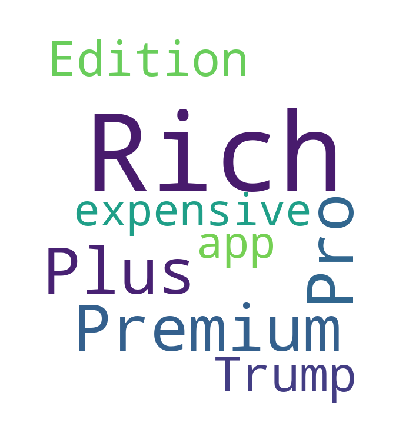

In [237]:
from wordcloud import WordCloud, STOPWORDS
ExpensiveApps = ' '
stopwords = set(STOPWORDS)
for app in Expensive_APPs['App']: 
    
    app = str(app) 
    ExpensiveApps = ExpensiveApps + app + ' '
  
wordcloud = WordCloud(width = 600, height = 700, 
                background_color ='white', stopwords = stopwords, 
                min_font_size = 10).generate(ExpensiveApps) 
  
# plot the WordCloud image                        
fig = plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
fig.savefig('Figures/MostExpensiveApps.jpg')  
plt.show() 

### Finding the Category of apps that are not offered as a free or paid

29 out of 33 categories contain both free and paid apps, the other 4 categories contain only free apps. 

In [238]:
Paid_Categories = Applications.drop(['App', 'Rating', 'Size', 'Reviews', 'Installs', 'Type','Last Updated', 'Content Rating', 'Genres', 'Last Updated Numeric'], axis=1)
Free_Categories = Paid_Categories.copy()
Free_Categories = Free_Categories[Free_Categories.Price == 0.0]
Free_Categories = Free_Categories.groupby('Category', as_index=False)['Price'].sum()
Paid_Categories = Paid_Categories[Paid_Categories.Price > 0.0]
Paid_Categories = Paid_Categories.groupby('Category', as_index=False)['Price'].sum()
print(f"Number of free categories: {len(Free_Categories['Category'].values)}")
print(f"Number of paid categories: {len(Paid_Categories['Category'].values)}")
print("Categories that are not offered as paid : ")
for cat in Free_Categories['Category'].values:
    if cat not in Paid_Categories['Category'].values:
         print(cat) 


Number of free categories: 33
Number of paid categories: 29
Categories that are not offered as paid : 
BEAUTY
COMICS
HOUSE AND HOME
LIBRARIES AND DEMO


### Scaling the installs and the last updated date (Numeric value)

In [239]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 10))
Applications[['Installs','Last Updated Numeric']] = scaler.fit_transform(Applications[['Installs','Last Updated Numeric']])
Applications[['Installs','Last Updated Numeric']].head()

/Users/loai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Installs,Last Updated Numeric
0,0.0001,9.290237
1,0.0050,9.316894
2,0.0500,9.976674
3,0.5000,9.796734
4,0.0010,9.836721


## C- Correlations between columns

As seen in the table below, the correlation is weak between columns 

In [240]:
Applications.corr()

,Rating,Size,Installs,Price,Last Updated Numeric
Rating,1.000000,0.057274,0.040392,-0.020276,0.118312
Size,0.057274,1.000000,0.040742,-0.021537,0.204846
Installs,0.040392,0.040742,1.000000,-0.008844,0.077873
Price,-0.020276,-0.021537,-0.008844,1.000000,-0.000074
Last Updated Numeric,0.118312,0.204846,0.077873,-0.000074,1.000000


As seen in the figure below, the correlation between 'Installs' and 'Size' columns are weak and resulting in a weird figure

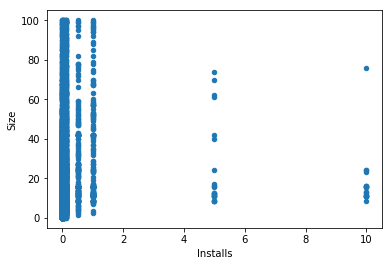

In [241]:
Applications.plot.scatter('Installs','Size')

## D - Investigating App categories

### 1. What are the top rated categories ?

We computed the average rating of all categories using the rating of each application in each category to determine the top rated categories. We found that the top five categories are Events, Art and Design, Books and Reference, Education and Personalization. However the top installed categories are Game, Communication, Tools, Productivity and Social, in which there is no matching between top rated categories and top installed categories. The aforementioned result was expected because it is logically that the category got high number of installed  might not get a high rating as this means that people discover  bugs and features they prefer not listed in these apps in the top installed categories.


In [242]:
rating = Applications.groupby('Category', as_index=False)['Rating'].mean()
Categories_Mean_Of_Rating = pd.DataFrame(rating)
Categories_Mean_Of_Rating.columns = ['Category', 'Rating']
Categories_Mean_Of_Rating = Categories_Mean_Of_Rating.sort_values(by = 'Rating', ascending = False)
Categories_Mean_Of_Rating.reset_index(drop = True)


Categories_Mean_Of_Rating




,Category,Rating
10,EVENTS,4.435556
8,EDUCATION,4.364317
0,ART AND DESIGN,4.362756
3,BOOKS AND REFERENCE,4.344970
23,PERSONALIZATION,4.332215
2,BEAUTY,4.278571
22,PARENTING,4.275111
27,SOCIAL,4.247291
14,GAME,4.244494
32,WEATHER,4.243056


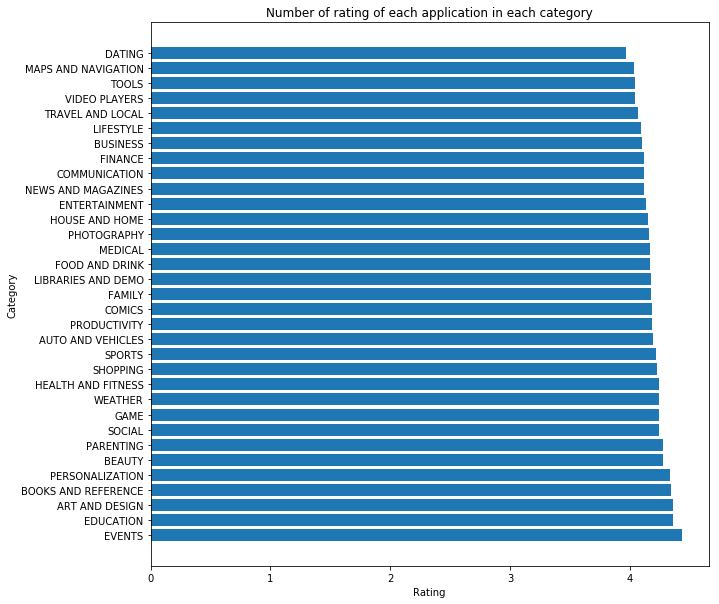

In [243]:
ratingValues = Categories_Mean_Of_Rating['Rating'].values
categoryValues = Categories_Mean_Of_Rating['Category'].values

fig = plt.figure(figsize=(10,10))

plt.barh(np.arange(len(ratingValues)) , ratingValues )
plt.yticks(np.arange(len(countValues)) , categoryValues )

plt.ylabel('Category')
plt.xlabel('Rating')
plt.title("Number of rating of each application in each category")
plt.show()


fig.savefig('Figures/Bar_RatingVSCategory.jpg')

### Representing the rating values by Boxplot diagram; we can view the minimum, maximum, mean and outliers

For example, for the 'ART AND DESIGN'; the maximum was at 5.0, the minimum was at 3.25 and the mean was slightly below 4.5

and for the 'BOOKS AND REFERENCE'; the maximum was at 5.0, the minimum was at 3.7 , the mean was slightly above 4.0 and showing multiple outliers below the minimum.

and similarly for the rest of the values.

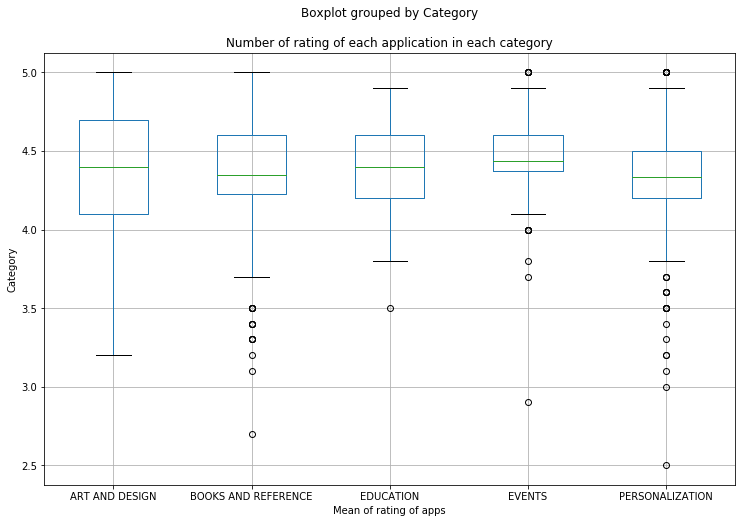

In [244]:
ratingValues = Categories_Mean_Of_Rating['Rating'].values
categoryValues = Categories_Mean_Of_Rating['Category'].values


App3 = Applications.loc[(Applications.Category == 'EVENTS') | (Applications.Category == 'EDUCATION') | (Applications.Category == 'ART AND DESIGN') |  (Applications.Category == 'BOOKS AND REFERENCE') | (Applications.Category == 'PERSONALIZATION')  ]

App3

App3.boxplot(column='Rating', by='Category',figsize=(12,8))

plt.ylabel('Category')
plt.xlabel('Mean of rating of apps')
plt.title("Number of rating of each application in each category")
plt.savefig('Figures/BoxPlot_RatingVSCategory.jpg') 
